In [19]:
import pandas as pd

file_path = r"C:\Users\User\Downloads\Anaconda\Risk Behavior Features Analysis\risk_behavior_features.csv"
df = pd.read_csv(file_path)

# Basic inspection
print(df.shape)
print(df.info())
print(df.head())


(73, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   73 non-null     int64  
 1   Gender                73 non-null     object 
 2   Education Level       73 non-null     object 
 3   Marital Status        73 non-null     object 
 4   Number of Dependents  73 non-null     int64  
 5   Income                73 non-null     int64  
 6   Credit Score          73 non-null     int64  
 7   Debt-to-Income Ratio  73 non-null     float64
 8   Assets Value          73 non-null     int64  
 9   Defaults Records      73 non-null     int64  
 10  Employment Status     73 non-null     object 
 11  Years in Current Job  73 non-null     int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 7.0+ KB
None
   Age      Gender Education Level Marital Status  Number of Dependents  \
0   36      Female      Bachelor

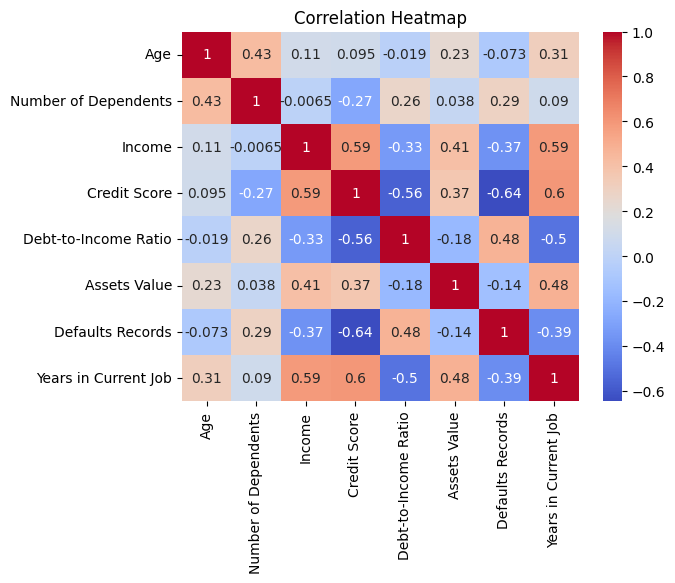

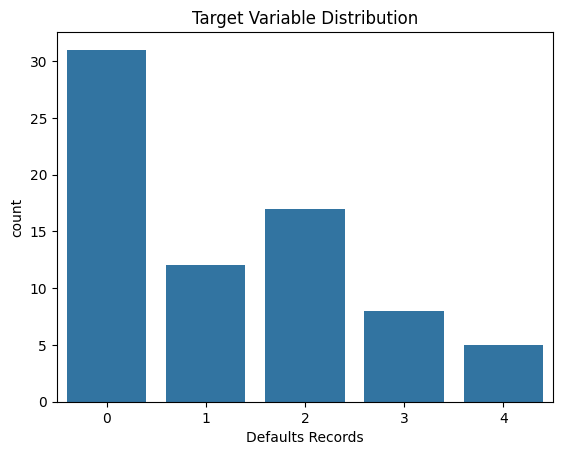

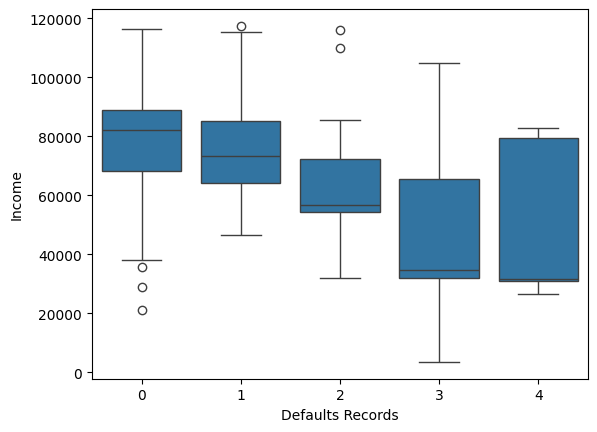

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for numeric features
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Default Records
sns.countplot(x='Defaults Records', data=df)
plt.title("Target Variable Distribution")
plt.show()

# Boxplot: Income vs. Defaults Records
sns.boxplot(x='Defaults Records', y='Income', data=df)
plt.show()


In [21]:
# Convert categorical features
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Employment Status', 'Years in Current Job']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Binary classification target
df_encoded['Default_Binary'] = df_encoded['Defaults Records'].apply(lambda x: 1 if x >= 1 else 0)

# Drop multi-class target 
X = df_encoded.drop(columns=['Defaults Records', 'Credit Score']) 
y = df_encoded['Default_Binary']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[6 0]
 [0 9]]


In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[6 0]
 [0 9]]


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Keep Credit Score as target
y_score = df_encoded['Credit Score']
X_score = df_encoded.drop(columns=['Defaults Records', 'Default_Binary', 'Credit Score'])

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_score, y_score, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_s, y_train_s)
y_pred_score = rf_reg.predict(X_test_s)

print("RMSE:", mean_squared_error(y_test_s, y_pred_score, squared=False))
print("R2 Score:", r2_score(y_test_s, y_pred_score))


RMSE: 46.74507703134809
R2 Score: 0.4764210107623529
